# Inaugural Project

# Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

from HouseholdSpecializationModel import HouseholdSpecializationModelClass
from loop_alpha_sigma import loop_alpha_sigma

%load_ext autoreload
%autoreload 2

# Predefine options for all plots
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"-"})
plt.rcParams.update({'font.size': 14})

# Question 1

To solve this question, we ran all the values of alpha and sigma through a for loop and recording all the answers.

In [2]:
# a. setting parameters
alpha_vec = np.linspace(0.25,0.75,3)
sigma_vec = np.linspace(0.5,1.5,3)

# b. solve
loop_alpha_sigma(alpha_vec,sigma_vec)

c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))


(α, σ) : (0.25, 0.50) --> ratio = 0.5455
(α, σ) : (0.25, 1.00) --> ratio = 0.3077
(α, σ) : (0.25, 1.50) --> ratio = 0.2143
(α, σ) : (0.50, 0.50) --> ratio = 1.0000
(α, σ) : (0.50, 1.00) --> ratio = 1.0000
(α, σ) : (0.50, 1.50) --> ratio = 1.0000
(α, σ) : (0.75, 0.50) --> ratio = 1.8333
(α, σ) : (0.75, 1.00) --> ratio = 3.2500
(α, σ) : (0.75, 1.50) --> ratio = 4.6667


# Question 2

To solve this question we used the solve_wF_vec method, which records the values of the solutions for each value of wF in the vector.


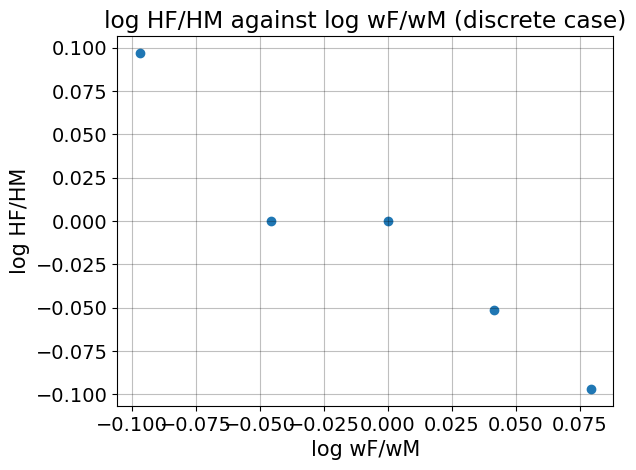

In [3]:
# a. settings
model = HouseholdSpecializationModelClass()
model.par.wM_vec = np.ones(len(model.par.wF_vec))

# b. solve
sol = model.solve_wF_vec(discrete=True)

# c. log the ratios
logHF_HM = np.log10(sol.HF_vec / sol.HM_vec)
logwF_wM = np.log10(model.par.wF_vec / model.par.wM_vec)

# d. plot 
plt.scatter(logwF_wM, logHF_HM)
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("log HF/HM against log wF/wM (discrete case)")
plt.show()


# Question 3

We used the same method used in question 2, but solving continuously.

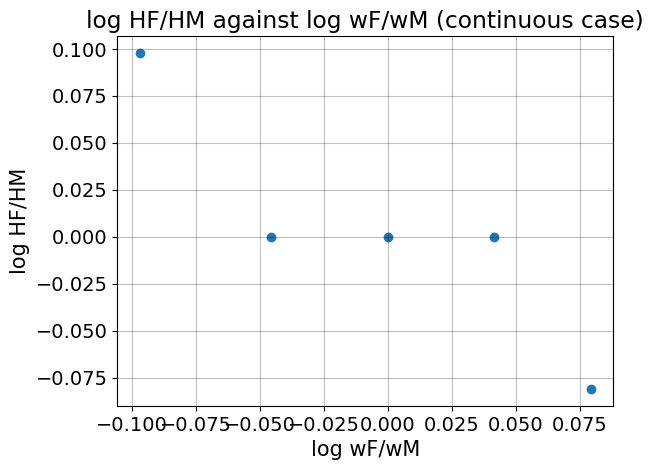

In [4]:
# a. solve
sol = model.solve_wF_vec()

# b. log the ratios
logHF_HM = np.log10(sol.HF_vec / sol.HM_vec)
logwF_wM = np.log10(model.par.wF_vec / model.par.wM_vec)

# c. plot 
plt.scatter(logwF_wM, logHF_HM)
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("log HF/HM against log wF/wM (continuous case)")
plt.show()

# Question 4

To get the desired result we changed the bounds of alpha and sigma, from broader to narrower, to get closer results to the reality.

c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: divide by zero encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))
c:\Users\lmigu\OneDrive\Documentos\Uni\Semestre 4 (Erasmus)\Programming\coding\projects-2023-the-best-duo\inauguralproject\HouseholdSpecializationModel.py:64: RuntimeWarning: invalid value encountered in double_scalars
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma) + par.alpha*HF**((par.sigma-1)/par.sigma)) ** (par.sigma/(par.sigma-1))


The best answer is: alpha = 0.9997333333333334, sigma = 0.11055555555555556, with error = 0.0003447854695612546.


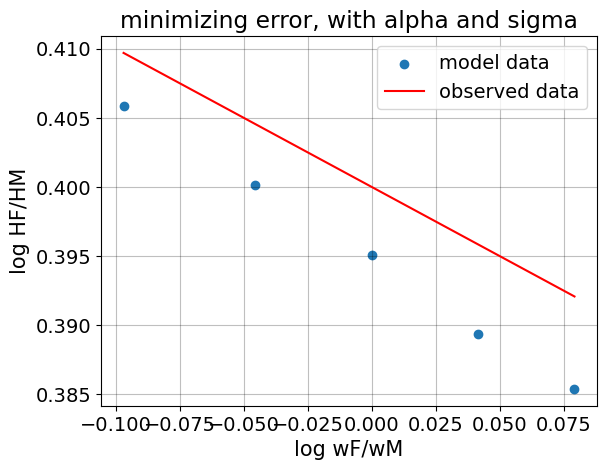

In [5]:
# a. resseting the model
par = model.par

# b. estimate best values for alpha and sigma
obs_par = model.estimate(min_alpha=0.9994,max_alpha=1,min_sigma=0.11,max_sigma=0.111,wM=1,n=10)
par.alpha, par.sigma, par.wM = obs_par
model.solve_wF_vec()

# c. plot model data
plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# d. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM) 
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# e. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with alpha and sigma")
plt.legend()
plt.show()


**Answer:**
According to our model, the best suited value for alpha is 0.99, which means that women would be way more efficient at home production than men. And since sigma is 0.11, elasticity of substitution is low, this would mean that both productions are close to being perfect complements, meaning we need both genders' home production to create home consumption.



# Question 5

**Trial 1:**
We decided to run the model by only changing sigma.

The best answer is: sigma = 0.2736842105263158, with error = 0.15996924054894993.


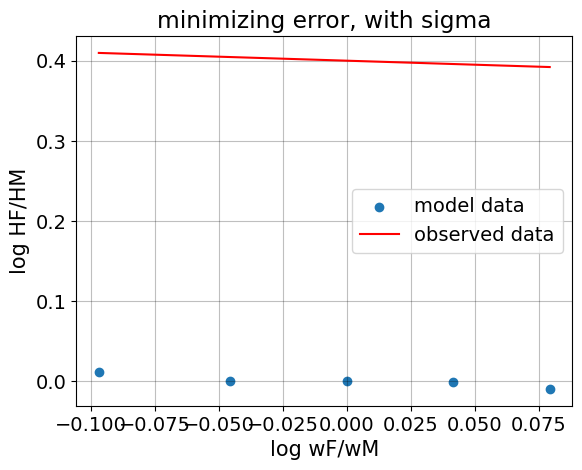

In [6]:
# a. estimate best values for sigma
obs_par = model.estimate(alpha=0.5,min_sigma=0.25,max_sigma=0.3,wM=1,n=20)
par.alpha, par.sigma, par.wM = obs_par
model.solve_wF_vec()

# b. plot model data
plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# c. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM) 
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# d. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with sigma")
plt.legend()
plt.show()

As we can see, the best value for sigma does not approximate the observed values for beta 0 and beta 1.

**Trial 2:**
We decided to also change the wage of males, to represent the real-world wage gap.


The best answer is: sigma = 2.933333333333333, wM = 2.05, with error = 2.3534256097946762e-07.


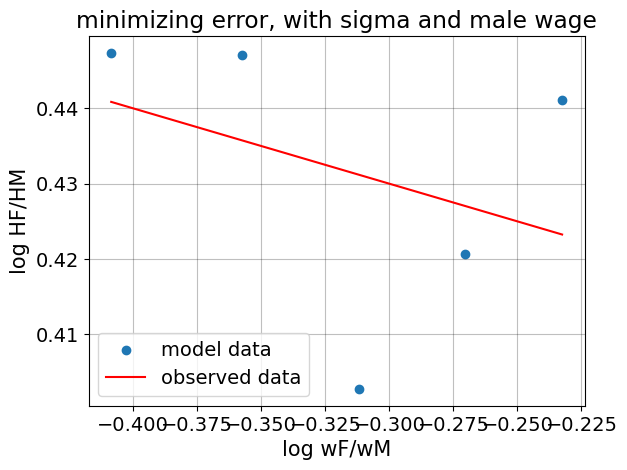

In [7]:
# a. estimate best values for sigma
obs_par = model.estimate(alpha=0.5,min_sigma=2.9,max_sigma=3,min_wM=2,max_wM=2.1,n=10)
par.alpha, par.sigma, par.wM = obs_par
model.solve_wF_vec()

# b. plot data 
plt.figure()
plt.scatter(np.log10(par.wF_vec/par.wM), np.log10(sol.HF_vec/sol.HM_vec), label='model data')

# c. plot observed data
y_model = par.beta0_target + par.beta1_target * np.log10(par.wF_vec/par.wM)
plt.plot(np.log10(par.wF_vec/par.wM), y_model, label='observed data', color='red')

# d. plot settings
plt.xlabel("log wF/wM",size=15)
plt.ylabel("log HF/HM",size=15)
plt.title("minimizing error, with sigma and male wage")
plt.legend()
plt.show()


This time, our model better follows the desired data, meaning that we have evidence that wage gap has an impact in the home production. The 2.93 sigma implies that the elasticity of substitution between the hours worked between genders is very high. The fact that in this model, the best male wage is 2.05 means that, according to it, male wages tends to be twice as much as female wages.

Concluding, our model tells us that the wage gap has a big impact on the real life home production division between the sexes.